<a href="https://colab.research.google.com/github/2256haradityam/Projects/blob/main/CARPRICEPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('https://github.com/2256haradityam/dataset/raw/refs/heads/main/breast-cancer.csv')

In [40]:
df.head()

,CLASSIFICATION,AGE,MENOPAUSE,SIZEOFTUMOR,INVNODES,NC,DM,BS,BQ,IR
0,0,0,0,2,0,0,3,0,0,0
1,0,1,0,4,0,0,2,1,2,0
2,0,1,0,4,0,0,2,0,0,0
3,0,3,1,5,0,0,2,1,1,0
4,0,1,0,1,0,0,2,1,3,0


<Axes: >

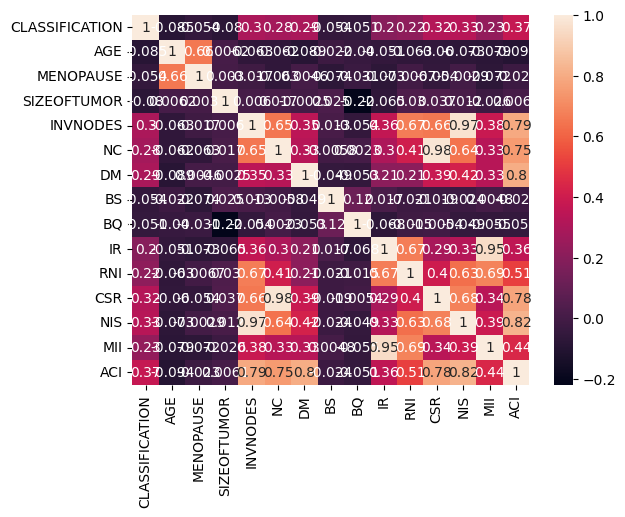

In [26]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['SIZEOFTUMOR'] = df['SIZEOFTUMOR'].apply(lambda x: 0 if x in['45-49','5-9'] else (1 if x in ['50-54','0-4'] else (2 if x == '30-34' else (3 if x == '25-29' else (4 if x == '20-24' else (5 if x == '15-19' else(6 if x == '10-14' else (7 if x == '40-44' else 8))))))))

In [24]:
df['INVNODES'].value_counts()

,count
INVNODES,
0,212
1,63
2,10


In [25]:
df['ACI'] = df['NC'] + df['DM']+ df['INVNODES']

In [27]:
columns_to_encode = ['AGE', 'SIZEOFTUMOR', 'MENOPAUSE', 'INVNODES', 'DM', 'BQ','RNI','CSR','NIS','MII','ACI']

# Perform One-Hot Encoding and drop the original columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df_encoded = df_encoded.astype(int)

In [ ]:
df_encoded.head()

,CLASSIFICATION,NC,BS,IR,AGE_1,AGE_2,AGE_3,AGE_4,SIZEOFTUMOR_1,SIZEOFTUMOR_2,...,MENOPAUSE_1,MENOPAUSE_2,INVNODES_1,INVNODES_2,DM_2,DM_3,BQ_1,BQ_2,BQ_3,BQ_4
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df['INVNODES'] = df['INVNODES'].apply(lambda x: 0 if x in ['0-2'] else (1 if x in ['3-5', '6-8', '9-11'] else (2 if x in ['15-17', '12-14', '24-26'] else x)))

In [ ]:
df['BQ'] = df['BQ'].map({'left_low':0,'left_up':1,'right_up':2,'right_low':3,'central':4})

In [ ]:
df['MENOPAUSE']=df['MENOPAUSE'].fillna(2.0)

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a DataFrame named 'df'

# Filter rows with NA values in 'NC' column
df_na_nc = df[df['NC'].isna()]

# Remove rows with NA values in 'NC' column from the rest of the DataFrame
df_no_na_nc = df[df['NC'].notna()]

# Calculate cosine similarity between rows with NA values and rows without NA values
similarity_matrix = cosine_similarity(df_no_na_nc.drop('NC', axis=1), df_na_nc.drop('NC', axis=1))

# Find the index of the most similar row for each row with NA values
most_similar_index = similarity_matrix.argmax(axis=1)

# Get the corresponding rows from the DataFrame without NA values
similar_rows = df_no_na_nc.iloc[most_similar_index]

print(similar_rows)

    CLASSIFICATION  AGE  MENOPAUSE  SIZEOFTUMOR  INVNODES   NC  DM  BS  BQ  IR
4                0    1          0            1         0  0.0   2   1   3   0
0                0    0          0            2         0  0.0   3   0   0   0
7                0    3          1            4         0  0.0   1   0   0   0
6                0    2          0            3         0  0.0   2   0   0   0
0                0    0          0            2         0  0.0   3   0   0   0
..             ...  ...        ...          ...       ...  ...  ..  ..  ..  ..
0                0    0          0            2         0  0.0   3   0   0   0
0                0    0          0            2         0  0.0   3   0   0   0
6                0    2          0            3         0  0.0   2   0   0   0
4                0    1          0            1         0  0.0   2   1   3   0
4                0    1          0            1         0  0.0   2   1   3   0

[277 rows x 10 columns]


In [31]:
df[df['NC'].isna()]

,CLASSIFICATION,AGE,MENOPAUSE,SIZEOFTUMOR,INVNODES,NC,DM,BS,BQ,IR,RNI,CSR,NIS,MII,ACI


In [ ]:
df['NC'].value

In [ ]:
df['NC'] = df['NC'].astype(int)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7017543859649122
RandomForest Accuracy: 0.7017543859649122
KNN Accuracy: 0.6842105263157895
LogisticRegression Accuracy: 0.7017543859649122


In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7192982456140351
RandomForest Accuracy: 0.7017543859649122
KNN Accuracy: 0.6666666666666666
LogisticRegression Accuracy: 0.7368421052631579


In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV with KFold cross-validation
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=kf, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model and print classification report for the best variant
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.6842105263157895
SVM Classification Report:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        37
           1       1.00      0.10      0.18        20

    accuracy                           0.68        57
   macro avg       0.84      0.55      0.49        57
weighted avg       0.79      0.68      0.59        57

RandomForest Accuracy: 0.6666666666666666
RandomForest Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        37
           1       0.57      0.20      0.30        20

    accuracy                       

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV with KFold cross-validation
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=kf, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model and print classification report for the best variant
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7543859649122807
SVM Classification Report:

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        37
           1       1.00      0.30      0.46        20

    accuracy                           0.75        57
   macro avg       0.86      0.65      0.65        57
weighted avg       0.82      0.75      0.71        57

RandomForest Accuracy: 0.7017543859649122
RandomForest Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.62      0.40      0.48        20

    accuracy                       

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV with KFold cross-validation and train_test_split
train_test_splits = [0.1,0.15, 0.2, 0.25,0.3,0.35, 0.4,0.45, 0.5,0.55,0.6]  # Different train-test split ratios

best_models = {}
for split_ratio in train_test_splits:
    print(f"\nEvaluating with train_test_split ratio: {1 - split_ratio} train, {split_ratio} test\n")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=split_ratio, random_state=42)

    for classifier_name, classifier in classifiers.items():
        print(f"Training {classifier_name} with split {split_ratio}...")

        # Brute force with GridSearchCV and KFold
        grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=kf, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Evaluate the best model on the test data
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{classifier_name} Accuracy with split {split_ratio}: {accuracy}")
        print(f"{classifier_name} Classification Report with split {split_ratio}:\n")
        print(classification_report(y_test, y_pred))

        # Store the best model for each classifier and split
        best_models[(classifier_name, split_ratio)] = best_model

# After completing all splits and classifiers, the best models will be stored in `best_models`



Evaluating with train_test_split ratio: 0.9 train, 0.1 test

Training SVM with split 0.1...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVM Accuracy with split 0.1: 0.7241379310344828
SVM Classification Report with split 0.1:

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        18
           1       1.00      0.27      0.43        11

    accuracy                           0.72        29
   macro avg       0.85      0.64      0.62        29
weighted avg       0.81      0.72      0.67        29

Training RandomForest with split 0.1...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForest Accuracy with split 0.1: 0.7241379310344828
RandomForest Classification Report with split 0.1:

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.80      0.36      0.50        11

    accuracy                           0.72        

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV with KFold cross-validation and train_test_split
train_test_splits = [0.1,0.15, 0.2, 0.25,0.3,0.35, 0.4,0.45, 0.5,0.55,0.6]  # Different train-test split ratios

best_models = {}
for split_ratio in train_test_splits:
    print(f"\nEvaluating with train_test_split ratio: {1 - split_ratio} train, {split_ratio} test\n")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=split_ratio, random_state=42)

    for classifier_name, classifier in classifiers.items():
        print(f"Training {classifier_name} with split {split_ratio}...")

        # Brute force with GridSearchCV and KFold
        grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=kf, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Evaluate the best model on the test data
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{classifier_name} Accuracy with split {split_ratio}: {accuracy}")
        print(f"{classifier_name} Classification Report with split {split_ratio}:\n")
        print(classification_report(y_test, y_pred))

        # Store the best model for each classifier and split
        best_models[(classifier_name, split_ratio)] = best_model

# After completing all splits and classifiers, the best models will be stored in `best_models`



Evaluating with train_test_split ratio: 0.9 train, 0.1 test

Training SVM with split 0.1...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVM Accuracy with split 0.1: 0.6896551724137931
SVM Classification Report with split 0.1:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        18
           1       1.00      0.18      0.31        11

    accuracy                           0.69        29
   macro avg       0.83      0.59      0.55        29
weighted avg       0.79      0.69      0.61        29

Training RandomForest with split 0.1...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForest Accuracy with split 0.1: 0.6896551724137931
RandomForest Classification Report with split 0.1:

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        18
           1       0.75      0.27      0.40        11

    accuracy                           0.69        

In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df.drop(columns='CLASSIFICATION')
y = df['CLASSIFICATION']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7368421052631579
RandomForest Accuracy: 0.7368421052631579
KNN Accuracy: 0.7368421052631579
LogisticRegression Accuracy: 0.7368421052631579


In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df.drop(columns='CLASSIFICATION')
y = df['CLASSIFICATION']

# Standardize the features before applying PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7192982456140351
RandomForest Accuracy: 0.7192982456140351
KNN Accuracy: 0.6842105263157895
LogisticRegression Accuracy: 0.7017543859649122
